In [1]:
import osmnx as ox
import geopandas as gpd
import numpy as npm
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import LineString
from shapely.geometry import MultiLineString
from collections import deque
import datetime

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
CRS_PLOT = 'EPSG:4326'
DATA_DIR = '../data'
EXPORTS_DIR = f'{DATA_DIR}/exports'
ROUTE = 'B61'
COLUMNS = ['route', 'x', 'latitude', 'longitude', 'bus_id', 'datetime']

In [3]:
bus_df = pd.read_csv(f'{DATA_DIR}/MTA-Bus-2021-7-5.csv', names=COLUMNS)
bus_gdf = gpd.GeoDataFrame(bus_df, geometry=gpd.points_from_xy(bus_df['longitude'], bus_df['latitude'])).set_crs(CRS_PLOT)

In [4]:
b_gdf = bus_gdf[(bus_gdf['route'].str.contains(ROUTE)) & (bus_gdf['x'] == 1)]
b_gdf.head()

,route,x,latitude,longitude,bus_id,datetime,geometry
390,MTA NYCT_B61,1,40.689148,-73.990646,MTA NYCT_236,Sun Jul 04 23:43:50 CST 2021,POINT (-73.99065 40.68915)
898,MTA NYCT_B61,1,40.673813,-74.004936,MTA NYCT_410,Sun Jul 04 23:44:32 CST 2021,POINT (-74.00494 40.67381)
954,MTA NYCT_B61,1,40.657711,-73.982948,MTA NYCT_450,Sun Jul 04 23:42:07 CST 2021,POINT (-73.98295 40.65771)
1797,MTA NYCT_B61,1,40.689148,-73.990646,MTA NYCT_236,Sun Jul 04 23:43:50 CST 2021,POINT (-73.99065 40.68915)
2306,MTA NYCT_B61,1,40.673508,-74.003830,MTA NYCT_410,Sun Jul 04 23:45:33 CST 2021,POINT (-74.00383 40.67351)


In [5]:
b_gdf = b_gdf[['bus_id', 'x', 'datetime', 'latitude', 'longitude', 'geometry']]
b_gdf['datetime'] = pd.to_datetime(b_gdf['datetime']) - datetime.timedelta(hours=12)

In [6]:
b_gdf = b_gdf.sort_values(by=['bus_id', 'datetime'])

In [7]:
b_gdf.to_csv(f'{EXPORTS_DIR}/{ROUTE.lower()}_all_trajectories.csv', index=False)

<AxesSubplot:>

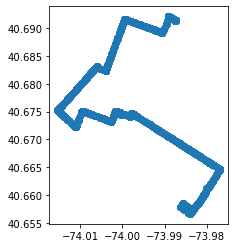

In [8]:
b_gdf.plot()